# **Automated URL validator - Checking whether a website URL exists or not**



**Goal:** Given a list of URLs, we want to validate whether the website links exist or not

## 1 - Import Libraries

In [13]:
import pandas as pd
import requests
import numpy as np

## 2 - Load CrowdTangle dataset 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/PATH_TO_THE_DIRECTORY")

In [4]:
csv_data = pd.read_csv("2022-06-01-15-32-30-CEST-Historical-Report-2013-12-31--2022-06-01.csv", low_memory=False,  lineterminator='\n', sep=';', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
csv_data.shape

(1000000, 40)

In [6]:
csv_data.columns

Index(['account.name', 'account.handle', 'platformId', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'subscriberCount', 'Followers at Posting', 'date', 'Post Created Date',
       'Post Created Time', 'type', 'totalInteraction',
       'statistics.actual.likeCount', 'statistics.actual.commentCount',
       'statistics.actual.shareCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.careCount', 'Video Share Status', 'Is Video Owner?',
       'statistics.actual.videoPostViewCount',
       'statistics.actual.videoTotalViewCount',
       'statistics.actual.videoAllCrosspostsViewCount', 'Video Length',
       'postUrl', 'message', 'expandedLinks.original',
       'expandedLinks.expanded', 'imageText', 'title', 'description',
       'brandedContentSponsor.platformId', 'brandedContentSponsor.name',
 

## 3 - Pre-processing of the dataset

Let us identify the top links/URLs present in the dataset

In [9]:
# top links 
all_URL = csv_data ['expandedLinks.original'].dropna().value_counts().index.tolist()

Select a sub-set of the top URLs where the links don't contain "www.facebook.com"

In [31]:
# top N links 
N= 1000 # choose any number for N

URL_list = [ x for x in all_URL if "www.facebook.com" not in x ][:N]

for i in range (np.size(URL_list)):
  print (URL_list[i]) 

http://reviewchuan.net/
http://spniyy.com/
https://youtu.be/odRybQ-yw4s
https://youtu.be/AG3tSIPNO-o
https://pindilink.xyz/2022/03/01/7788/
https://youtube.com/watch?v=k6--S1Rm2O8&feature=share
https://youtu.be/JAJqoOE5_-0
https://byniuty.xyz/2022/02/09/xxx/
https://sachkhabar.co.in/the-kashmir-files-film-earned-so-many-crores-in-a-day/
https://youtu.be/a8wDJKneNis
https://agarwalsmile.com/813-2/
http://beansetcetera.com/
https://sachkhabar.co.in/shahrukh-khans-condition-has-become-thin-if-pathan-film-flops-then-house-will-be-sold-mannat/
https://justsnappy.com/product-category/latest/
https://sachkhabar.co.in/big-news-about-vivek-agnihotri-after-y-category-security/
https://sachkhabar.co.in/gulshan-kumar-had-tried-his-hand-in-nirma-soap-business-started-langar-even-today-in-vaishno-devi/
https://fbviral.live/2022/02/04/30/
https://appearnews.com/private-photo-of-couple-vikrant-messi-and-wife-sheetal-who-went-on-honeymoon-leaked-on-social-media-people-were-shocked-to-see-all-this/
http

## 4 - Use the response from requests.get to validate the website URLs

Let's now define a simple function to call the response of get requests

In [15]:
def link_validator (URL):
  response = requests.get(str(URL))
  if response.status_code == 200:
    print(URL, '---> VALID')
  else:
    print(URL, '---> INVALID') 
  return

Let's try the function on a few example links (manually) and see whether it works or not!

In [16]:
link_validator ("https://www.facebook.com/106386034307076/posts/241870707425274")
link_validator ("https://khabarbharattak.com/rohingya-go-back-to-myanmar/")
link_validator ("https://sachkhabar.co.in/modi-governments-big-blow-to-zakir-naik/")

https://www.facebook.com/106386034307076/posts/241870707425274 ---> VALID
https://khabarbharattak.com/rohingya-go-back-to-myanmar/ ---> INVALID
https://sachkhabar.co.in/modi-governments-big-blow-to-zakir-naik/ ---> INVALID


Let's modify the above *simple* get request function to bypass the connection errors

In [17]:
def url_exists_stream(URL: str):
    try:
        with requests.get(URL, stream=True) as response:
            try:
                response.raise_for_status()
                print (URL, '---> VALID')
                return 1
            except requests.exceptions.HTTPError:
                print (URL, '---> INVALID')
                return 0
    except requests.exceptions.ConnectionError:
        print (URL, '---> INVALID')
        return 0

Let's now apply the modified function on top 100 shared links we have scrapped from CrowdTangle

In [32]:
all_pred = [] 
valid_links = []
invalid_links = []

for i in range (np.size(URL_list)):
  pred = url_exists_stream (URL_list[i])
  if pred == 1:
    valid_links.append (URL_list[i])
  else:
    invalid_links.append (URL_list[i])
  all_pred.append(pred)

http://reviewchuan.net/ ---> VALID
http://spniyy.com/ ---> VALID
https://youtu.be/odRybQ-yw4s ---> VALID
https://youtu.be/AG3tSIPNO-o ---> VALID
https://pindilink.xyz/2022/03/01/7788/ ---> VALID
https://youtube.com/watch?v=k6--S1Rm2O8&feature=share ---> VALID
https://youtu.be/JAJqoOE5_-0 ---> VALID
https://byniuty.xyz/2022/02/09/xxx/ ---> VALID
https://sachkhabar.co.in/the-kashmir-files-film-earned-so-many-crores-in-a-day/ ---> INVALID
https://youtu.be/a8wDJKneNis ---> VALID
https://agarwalsmile.com/813-2/ ---> VALID
http://beansetcetera.com/ ---> VALID
https://sachkhabar.co.in/shahrukh-khans-condition-has-become-thin-if-pathan-film-flops-then-house-will-be-sold-mannat/ ---> INVALID
https://justsnappy.com/product-category/latest/ ---> VALID
https://sachkhabar.co.in/big-news-about-vivek-agnihotri-after-y-category-security/ ---> INVALID
https://sachkhabar.co.in/gulshan-kumar-had-tried-his-hand-in-nirma-soap-business-started-langar-even-today-in-vaishno-devi/ ---> INVALID
https://fbviral.

Let's print the valid and invalid links

In [33]:
print ("-------------------------")
print ('The list of valid links:')
print ("-------------------------")

for i in range (np.size(valid_links)):
  print (valid_links[i]) 

print ("-------------------------")
print ('The list of invalid links:')
print ("-------------------------")

for i in range (np.size(invalid_links)):
  print (invalid_links[i]) 

-------------------------
The list of valid links:
-------------------------
http://reviewchuan.net/
http://spniyy.com/
https://youtu.be/odRybQ-yw4s
https://youtu.be/AG3tSIPNO-o
https://pindilink.xyz/2022/03/01/7788/
https://youtube.com/watch?v=k6--S1Rm2O8&feature=share
https://youtu.be/JAJqoOE5_-0
https://byniuty.xyz/2022/02/09/xxx/
https://youtu.be/a8wDJKneNis
https://agarwalsmile.com/813-2/
http://beansetcetera.com/
https://justsnappy.com/product-category/latest/
https://fbviral.live/2022/02/04/30/
https://janganapp.page.link/X42f
https://sachkhabar.co.in/daily-news/mukesh-ambani-is-going-to-be-ruined-1400-petrol-is-in-danger-of-being-stopped-know-why/
https://youtu.be/Yj4lSve9AvU
https://khabarbharattak.com/mouni-roy-the-heroine-of-the-naagin-drama-wore-such-a-tight-dress-that-everyone-became-intoxicated/
https://khabarbharattak.com/hindu-society-came-on-the-streets-to-shut-down-the-show-of-kapil-sharma-who-refused-to-promote-the-kashmir-files/
https://youtube.com/watch?v=SjYGo6lAl

Historgram of the output of URL validator

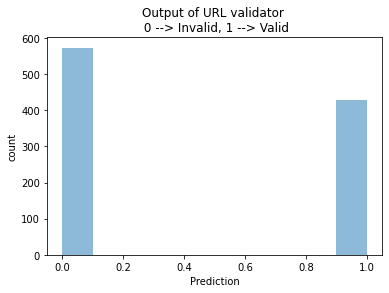

In [34]:
from matplotlib import pyplot as plt
plt.hist(all_pred, bins=10, alpha=0.5)
plt.title('Output of URL validator \n 0 --> Invalid, 1 --> Valid')
plt.xlabel('Prediction')
plt.ylabel('count')
plt.show()

Compute the overall percentage of valid and invalid URLs

In [35]:
print ("Percentage of valid links:", np.size(valid_links)/np.size(URL_list)*100,"%")
print ("Percentage of invalid links:", np.size(invalid_links)/np.size(URL_list)*100,"%")

Percentage of valid links: 42.699999999999996 %
Percentage of invalid links: 57.3 %
